# Derivados Financieros 2021 - Clase 1

## Menu del dia:

    - (1) Web scraping de rava
    - (2) Limpieza y generacion de dataframe ad-hoc para futuros usos
    - (3) pyhomebroker (requiere acceso a ALyC que use HomeBroker)
    - (4) algunos plots de market data de opciones
    - (5) exportar a exel/csv 
    - (6) Comparar paneles (rava-hb) 
    
    

## (1) Web Scraping de la pagina de RAVA

Modulos necesarios

data_byma (en webcampus) ;

utils_opciones_byma (en webcampus)

bs4,

requests,

pandas,

matplotlib,

datetime,

calendar,


Instalarlos con Anaconda, comando Conda o comando pip install

### Importo los modulos

In [1]:
from data_byma import *
from utils_opciones_byma import *



### Metodo para el web scraping

In [2]:
panel_rava = web_scraping_opciones_rava()
panel_rava.head(20)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,AGRC24.0AG,5.800,0.00,5.800,5.800,5.80,5.800,11:24,-99.99,-99.99
1,ALUC31.0AG,29.800,0.00,29.800,30.999,29.80,30.999,11:35,-99.99,-99.99
2,ALUC31.0OC,30.010,-0.30,30.100,29.900,29.90,30.010,11:35,66.00,197351.00
3,ALUC35.0AG,27.990,9.77,25.499,27.990,27.99,27.990,11:08,85.00,237915.00
4,ALUC45.0AG,14.895,0.00,14.895,15.200,13.00,15.200,11:03,-99.99,-99.99
5,ALUC47.0AG,11.800,0.00,11.800,11.800,11.80,11.800,11:15,-99.99,-99.99
6,ALUC53.0AG,7.000,0.00,7.000,7.000,7.00,7.000,11:03,-99.99,-99.99
7,ALUC53.0OC,-99.990,-99.99,13.500,-99.990,-99.99,-99.990,11:03,-99.99,-99.99
8,ALUC57.0AG,4.850,0.00,4.850,5.000,4.80,5.000,11:21,-99.99,-99.99
9,ALUC57.0OC,9.500,0.00,9.500,-99.990,-99.99,-99.990,11:03,-99.99,-99.99


### Que hace internamente el metodo??

#### Beautiful Soup /requests 


Mas sobre BS4: https://j2logo.com/python/web-scraping-con-python-guia-inicio-beautifulsoup/

Mas sobre requests: https://www.digitalocean.com/community/tutorials/how-to-get-started-with-the-requests-library-in-python-es

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

#### Como usamos BeautifulSoup y requests

In [4]:
#url = 'http://www.rava.com/precios/panel.php?m=OPC'
url = 'http://clasico.rava.com/precios/panel.php?m=OPC'
#url = 'http://datos.rava.com/cotizaciones/opciones'
page = requests.get(url)
page

<Response [200]>

In [5]:
# En soup voy a encontrar el codigo html de la pagina

soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="rava,ravaonline,rava bursatil,rava sociedad de bolsa,bolsa,bursátil,bursatil,sociedad,acciones,bonos,merval,internet,operar,online,indice" name="keywords"/>
<meta content="Rava Bursátil" property="og:site_name"/>
<meta content="http://clasico.rava.com/precios/panel.php?m=OPC" property="og:url"/>
<meta content="Cotizaciones" name="title"/>
<meta content="Cotizaciones" property="og:title"/>
<meta content="Cotizaciones" name="twitter:title"/>
<title>Rava Bursátil - Cotizaciones</title>
<meta content="Información y asesoramiento personalizado para operar en los mercados locales e internacionales. Más de 60 años de trayectoria. Agente BYMA, MAE, ROFEX y MAV. Operamos acciones, bonos y opciones del mercado 

#### El arte del scraping

Aqui es donde uno tiene que meterse en el codigo interno de la pagina e 'identificar' la informacion que necesita. En este caso la tabla de informacion de opciones
Se puede hacer una inspeccion en modo dev del navegador


In [6]:
# En opciones tengo el contenido de la tabla correspondiente


opciones_html = soup.find('table', {'class': 'tablapanel2'})

opciones_html

<table align="center" border="0" cellpadding="4" cellspacing="0" class="tablapanel2" width="100%">
<tr align="right" class="cabecerapanel">
<td align="left"><a href="/precios/panel.php?m=OPC&amp;o=especie&amp;t=d">Especie</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=ultimo&amp;t=d">Último</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=variacion&amp;t=d">% Día</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=anterior&amp;t=d">Anterior</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=apertura&amp;t=d">Apertura</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=minimo&amp;t=d">Mínimo</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=maximo&amp;t=d">Máximo</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=hora&amp;t=d">Hora</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=volnominal&amp;t=d">Vol. Nominal</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=volefectivo&amp;t=d">Vol. Efe

#### Aqui continua el detalle. Se identifican las filas de la tabla. *tr* sera el separador que va empezando y cerrando las filas

In [7]:
# Filas ya va ordenando cada una de las opciones


filas = opciones_html.find_all('tr')
filas

[<tr align="right" class="cabecerapanel">
 <td align="left"><a href="/precios/panel.php?m=OPC&amp;o=especie&amp;t=d">Especie</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=ultimo&amp;t=d">Último</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=variacion&amp;t=d">% Día</a></td>
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=anterior&amp;t=d">Anterior</a></td>
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=apertura&amp;t=d">Apertura</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=minimo&amp;t=d">Mínimo</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=maximo&amp;t=d">Máximo</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=hora&amp;t=d">Hora</a></td>
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=volnominal&amp;t=d">Vol. Nominal</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=volefectivo&amp;t=d">Vol. Efectivo</a></td>
 </tr>,
 <tr class="ci">
 <td align="left" class="c1 b"><a href="/empresa

#### Identifico la primera linea, la de los -headers- de la tabla

In [8]:
tr = filas[0]
tr

<tr align="right" class="cabecerapanel">
<td align="left"><a href="/precios/panel.php?m=OPC&amp;o=especie&amp;t=d">Especie</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=ultimo&amp;t=d">Último</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=variacion&amp;t=d">% Día</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=anterior&amp;t=d">Anterior</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=apertura&amp;t=d">Apertura</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=minimo&amp;t=d">Mínimo</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=maximo&amp;t=d">Máximo</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=hora&amp;t=d">Hora</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=volnominal&amp;t=d">Vol. Nominal</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=volefectivo&amp;t=d">Vol. Efectivo</a></td>
</tr>

#### Identifico cada columna dentro de la fila con el marcador td


In [9]:
td = tr.find_all('td')
td


[<td align="left"><a href="/precios/panel.php?m=OPC&amp;o=especie&amp;t=d">Especie</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=ultimo&amp;t=d">Último</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=variacion&amp;t=d">% Día</a></td>,
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=anterior&amp;t=d">Anterior</a></td>,
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=apertura&amp;t=d">Apertura</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=minimo&amp;t=d">Mínimo</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=maximo&amp;t=d">Máximo</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=hora&amp;t=d">Hora</a></td>,
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=volnominal&amp;t=d">Vol. Nominal</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=volefectivo&amp;t=d">Vol. Efectivo</a></td>]

#### generamos una lista (ya un terreno mas conocido :)


In [10]:
row = [tr.text for tr in td]
row

['Especie',
 'Último',
 '% Día',
 'Anterior',
 'Apertura',
 'Mínimo',
 'Máximo',
 'Hora',
 'Vol. Nominal',
 'Vol. Efectivo']

#### Proceso de ir almacenando las filas en una lista d elistas (eventualmente terminara siendo un dataframe)

In [11]:
# inicializo una lista vacia, alli voy a ir poniendo el contenido de cada fila
l = []
l.append(row)

l

[['Especie',
  'Último',
  '% Día',
  'Anterior',
  'Apertura',
  'Mínimo',
  'Máximo',
  'Hora',
  'Vol. Nominal',
  'Vol. Efectivo']]

#### fila por fila  

In [12]:


tr = filas[1]
tr

<tr class="ci">
<td align="left" class="c1 b"><a href="/empresas/perfil.php?e=AGRC24.0AG">AGRC24.0AG</a></td>
<td class="c1">5,800</td>
<td class="c1 cg">0</td>
<td class="movil_hide_cell">5,800</td>
<td class="movil_hide_cell">5,800</td>
<td class="c1">5,800</td>
<td class="c1">5,800</td>
<td class="c1">11:24</td>
<td class="movil_hide_cell">-</td>
<td class="c1">-</td>
</tr>

In [13]:
td = tr.find_all('td')
row = [tr.text for tr in td]
row

['AGRC24.0AG',
 '5,800',
 '0',
 '5,800',
 '5,800',
 '5,800',
 '5,800',
 '11:24',
 '-',
 '-']

####  Aca las primeras intervenciones sobre la data que viene del html para que sea mas facil manipularla

In [14]:
#Reemplazo ',' por '.' y paso el string a float
for index in [1,2,3,4,5,6,8,9]:
    row[index] = row[index].replace('.', '')
    row[index] = row[index].replace(',', '.')
    try:
        row[index] = float(row[index])
    except:
        #Si no encuentra valor pone -99.99
        row[index] = -99.99

l.append(row)
    
l
    
    

[['Especie',
  'Último',
  '% Día',
  'Anterior',
  'Apertura',
  'Mínimo',
  'Máximo',
  'Hora',
  'Vol. Nominal',
  'Vol. Efectivo'],
 ['AGRC24.0AG', 5.8, 0.0, 5.8, 5.8, 5.8, 5.8, '11:24', -99.99, -99.99]]

In [15]:
#Ahora si, todas las filas
for tr in filas[2:]:
    td = tr.find_all('td')
    row = [tr.text for tr in td]

    #Reemplazo ',' por '.' y paso el string a float
    for index in [1,2,3,4,5,6,8,9]:
        row[index] = row[index].replace('.', '')
        row[index] = row[index].replace(',', '.')
        try:
            row[index] = float(row[index])
        except:
            #Si no encuentra valor pone -99.99
            row[index] = -99.99

    l.append(row)

In [16]:
# Como se ve l despues del ciclo?
l

[['Especie',
  'Último',
  '% Día',
  'Anterior',
  'Apertura',
  'Mínimo',
  'Máximo',
  'Hora',
  'Vol. Nominal',
  'Vol. Efectivo'],
 ['AGRC24.0AG', 5.8, 0.0, 5.8, 5.8, 5.8, 5.8, '11:24', -99.99, -99.99],
 ['ALUC31.0AG',
  29.8,
  0.0,
  29.8,
  30.999,
  29.8,
  30.999,
  '11:35',
  -99.99,
  -99.99],
 ['ALUC31.0OC', 30.01, -0.3, 30.1, 29.9, 29.9, 30.01, '11:35', 66.0, 197351.0],
 ['ALUC35.0AG',
  27.99,
  9.77,
  25.499,
  27.99,
  27.99,
  27.99,
  '11:08',
  85.0,
  237915.0],
 ['ALUC45.0AG',
  14.895,
  0.0,
  14.895,
  15.2,
  13.0,
  15.2,
  '11:03',
  -99.99,
  -99.99],
 ['ALUC47.0AG', 11.8, 0.0, 11.8, 11.8, 11.8, 11.8, '11:15', -99.99, -99.99],
 ['ALUC53.0AG', 7.0, 0.0, 7.0, 7.0, 7.0, 7.0, '11:03', -99.99, -99.99],
 ['ALUC53.0OC',
  -99.99,
  -99.99,
  13.5,
  -99.99,
  -99.99,
  -99.99,
  '11:03',
  -99.99,
  -99.99],
 ['ALUC57.0AG', 4.85, 0.0, 4.85, 5.0, 4.8, 5.0, '11:21', -99.99, -99.99],
 ['ALUC57.0OC',
  9.5,
  0.0,
  9.5,
  -99.99,
  -99.99,
  -99.99,
  '11:03',
  -99

#### Lo convierto en un DataFrame

In [17]:
panel_rava = pd.DataFrame(l[1:], columns=l[0])

panel_rava

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,AGRC24.0AG,5.800,0.00,5.800,5.800,5.80,5.800,11:24,-99.99,-99.99
1,ALUC31.0AG,29.800,0.00,29.800,30.999,29.80,30.999,11:35,-99.99,-99.99
2,ALUC31.0OC,30.010,-0.30,30.100,29.900,29.90,30.010,11:35,66.00,197351.00
3,ALUC35.0AG,27.990,9.77,25.499,27.990,27.99,27.990,11:08,85.00,237915.00
4,ALUC45.0AG,14.895,0.00,14.895,15.200,13.00,15.200,11:03,-99.99,-99.99
...,...,...,...,...,...,...,...,...,...,...
277,YPFV760.AG,30.000,0.00,30.000,30.000,30.00,30.000,11:34,-99.99,-99.99
278,YPFV760.DI,50.000,0.00,50.000,50.000,50.00,50.000,11:03,-99.99,-99.99
279,YPFV800.AG,60.000,0.00,60.000,60.200,60.00,60.200,11:18,-99.99,-99.99
280,YPFV800.OC,62.000,0.00,62.000,62.000,62.00,62.000,11:03,-99.99,-99.99


    ### lo mandamos a un csv

In [18]:
panel_rava.to_csv('panel_opciones_rava.csv')

### Panel acciones (bonus)

In [19]:
panel_acciones = obtener_panel_acciones()
panel_acciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,AGRO,"26,650","-0,93","26,900","27,050","26,500","27,100",11:38,7.505,200.764
1,AUSO,"99,900","1,11","98,800","100,500","98,800","100,500",11:34,1.462,144.928
2,BHIP,"9,520","-1,35","9,650","9,600","9,520","9,600",11:37,4.776,45.760
3,BOLT,"4,020","-0,50","4,040","4,100","3,980","4,100",11:37,50.529,202.681
4,BPAT,"70,600",0,"70,600","72,300","70,600","72,300",11:08,-,-
...,...,...,...,...,...,...,...,...,...,...
190,CEDEARWMT,4.065,"0,54",4.043,4.040,4.029,4.075,11:37,111,449.253
191,CEDEARX,1.446,"10,39",1.310,1.420,1.420,1.452,11:39,17.292,24.812.851
192,CEDEARXOM,2.123,"1,65",2.089,2.100,2.100,2.157,11:30,403,856.946
193,CEDEARXROX,4.168,0,4.168,4.069,4.069,4.183,11:39,-,-


## (2) Del panel de Rava crudo a otro con informacion customizada

### Metodo para generar el panel customizado

a) Panel crudo mas informacion masticada (columnas de la derecha)

In [20]:
panel_opciones_byma_all_raw = obtener_panel_opciones_byma(ticker = '', clean_flag = False)
panel_opciones_byma_all_raw

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC24.0AG,5.800,0.00,5.800,5.800,5.80,5.800,11:24,-99.99,-99.99,AGR,AGRO,C,24.0,AG,8,2021-08-20,26.65,39,1.110417
1,ALUC31.0AG,29.800,0.00,29.800,30.999,29.80,30.999,11:35,-99.99,-99.99,ALU,ALUA,C,31.0,AG,8,2021-08-20,58.00,39,1.870968
2,ALUC31.0OC,30.010,-0.30,30.100,29.900,29.90,30.010,11:35,66.00,197351.00,ALU,ALUA,C,31.0,OC,10,2021-10-15,58.00,95,1.870968
3,ALUC35.0AG,27.990,9.77,25.499,27.990,27.99,27.990,11:08,85.00,237915.00,ALU,ALUA,C,35.0,AG,8,2021-08-20,58.00,39,1.657143
4,ALUC45.0AG,14.895,0.00,14.895,15.200,13.00,15.200,11:03,-99.99,-99.99,ALU,ALUA,C,45.0,AG,8,2021-08-20,58.00,39,1.288889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,YPFV760.AG,30.000,0.00,30.000,30.000,30.00,30.000,11:34,-99.99,-99.99,YPF,YPFD,P,760.0,AG,8,2021-08-20,763.00,39,1.003947
278,YPFV760.DI,50.000,0.00,50.000,50.000,50.00,50.000,11:03,-99.99,-99.99,YPF,YPFD,P,760.0,DI,12,2021-12-17,763.00,158,1.003947
279,YPFV800.AG,60.000,0.00,60.000,60.200,60.00,60.200,11:18,-99.99,-99.99,YPF,YPFD,P,800.0,AG,8,2021-08-20,763.00,39,0.953750
280,YPFV800.OC,62.000,0.00,62.000,62.000,62.00,62.000,11:03,-99.99,-99.99,YPF,YPFD,P,800.0,OC,10,2021-10-15,763.00,95,0.953750


b) Panel limpiotodos los tickers

In [21]:
panel_opciones_byma_all_clean = obtener_panel_opciones_byma(ticker = '', clean_flag = True)
panel_opciones_byma_all_clean

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,GFGC180.JL,GGAL,142.80,C,180.00,4,3.500,3.500,0.793333
1,APLC2000AG,AAPL,2514.00,C,2000.00,39,406.000,406.000,1.257000
2,APLC2100AG,AAPL,2514.00,C,2100.00,39,500.000,500.000,1.197143
3,APLV2200AG,AAPL,2514.00,P,2200.00,39,35.000,35.000,1.142727
4,APLC2300AG,AAPL,2514.00,C,2300.00,39,290.000,290.000,1.093043
...,...,...,...,...,...,...,...,...,...
246,COMC1.19DI,COME,4.88,C,1.19,158,4.000,4.000,4.100840
247,GFGC170.DI,GGAL,142.80,C,170.00,158,17.500,17.500,0.840000
248,GFGC240.DI,GGAL,142.80,C,240.00,158,4.828,4.828,0.595000
249,YPFC760.DI,YPFD,763.00,C,760.00,158,100.000,100.000,1.003947


b) Panel limpio paa un ticker en particular

In [22]:
panel_opciones_byma_GGAL_clean = obtener_panel_opciones_byma('GGAL', True)
panel_opciones_byma_GGAL_clean

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,GFGC180.JL,GGAL,142.8,C,180.000,4,3.500,3.500,0.793333
1,GFGC82983G,GGAL,142.8,C,82.983,39,86.984,86.984,1.720834
2,GFGV82983G,GGAL,142.8,P,82.983,39,0.081,0.106,1.720834
3,GFGV87.0AG,GGAL,142.8,P,87.000,39,0.090,0.120,1.641379
4,GFGC90.0AG,GGAL,142.8,C,90.000,39,56.600,56.600,1.586667
...,...,...,...,...,...,...,...,...,...
56,GFGC19898O,GGAL,142.8,C,198.980,95,6.600,6.600,0.717660
57,GFGC220.OC,GGAL,142.8,C,220.000,95,3.500,3.500,0.649091
58,GFGC240.OC,GGAL,142.8,C,240.000,95,3.100,3.220,0.595000
59,GFGC170.DI,GGAL,142.8,C,170.000,158,17.500,17.500,0.840000


### Que hace el metodo internamente?



#### 1) Levanta los paneles de opciones y de acciones y genera una copia del de opciones

In [23]:
panel_rava = web_scraping_opciones_rava()
#Obtengo el panel crudo de acciones (para el spot)
panel_acciones = obtener_panel_acciones()

#Genero el nuevo panel
panel_opciones = panel_rava.copy()


#### 2) Inicializo las columnas nuevas a agregar del Dataframe

In [24]:
#Le agrego las nuevas columnas (ojo con los tipos string, float, int, datetime)
panel_opciones['Ticker_Opcion'] = ''
panel_opciones['Ticker_Stock'] = ''
panel_opciones['Tipo'] = ''
panel_opciones['Strike'] = 0.0
panel_opciones['ExpiryMonthName'] = ''
panel_opciones['ExpiryMonthNumber'] = 0
panel_opciones['ExpiryDate'] = datetime.date.today()
panel_opciones['Spot'] = 0.0
panel_opciones['TTM'] = 0
panel_opciones['Moneyness'] = 0.0

panel_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC24.0AG,5.800,0.00,5.800,5.800,5.80,5.800,11:24,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0
1,ALUC31.0AG,29.800,0.00,29.800,30.999,29.80,30.999,11:35,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0
2,ALUC31.0OC,30.010,-0.30,30.100,29.900,29.90,30.010,11:35,66.00,197351.00,,,,0.0,,0,2021-07-12,0.0,0,0.0
3,ALUC35.0AG,27.990,9.77,25.499,27.990,27.99,27.990,11:08,85.00,237915.00,,,,0.0,,0,2021-07-12,0.0,0,0.0
4,ALUC45.0AG,14.895,0.00,14.895,15.200,13.00,15.200,11:03,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,YPFV760.AG,30.000,0.00,30.000,30.000,30.00,30.000,11:34,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0
278,YPFV760.DI,50.000,0.00,50.000,50.000,50.00,50.000,11:03,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0
279,YPFV800.AG,60.000,0.00,60.000,60.200,60.00,60.200,11:18,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0
280,YPFV800.OC,62.000,0.00,62.000,62.000,62.00,62.000,11:03,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0


#### 3) Recorro fila por fila para llenar las nuevas columnas (1 ejemplo)

##### *) Desgloso la especie en ticker, strike, vencimiento y tipo

In [25]:
fila = 0


panel_opciones.Ticker_Opcion.values[fila] = panel_opciones.Especie.values[fila][0:3]

panel_opciones.Tipo.values[fila] = panel_opciones.Especie.values[fila][3:4]
panel_opciones.Strike.values[fila] = panel_opciones.Especie.values[fila][4:8]
panel_opciones.ExpiryMonthName.values[fila] = panel_opciones.Especie.values[fila][8:10]

panel_opciones.head(2)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC24.0AG,5.8,0.0,5.8,5.800,5.8,5.800,11:24,-99.99,-99.99,AGR,,C,24.0,AG,0,2021-07-12,0.0,0,0.0
1,ALUC31.0AG,29.8,0.0,29.8,30.999,29.8,30.999,11:35,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0


##### *) Uno a uno voy generando lo necesario

In [26]:
panel_opciones.Ticker_Stock.values[fila] = conversor_ticker(panel_opciones.Ticker_Opcion.values[fila])

panel_opciones.Tipo.values[fila] = panel_opciones.Tipo.values[fila].replace('V', 'P')

panel_opciones.head(2)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC24.0AG,5.8,0.0,5.8,5.800,5.8,5.800,11:24,-99.99,-99.99,AGR,AGRO,C,24.0,AG,0,2021-07-12,0.0,0,0.0
1,ALUC31.0AG,29.8,0.0,29.8,30.999,29.8,30.999,11:35,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.0,0,0.0


In [27]:
# Artilugio que lo tuve que usar NO RECUERDO POR QUE! :)

try:
    int(panel_opciones.ExpiryMonthName.values[fila][0])
    panel_opciones.Strike.values[fila] = float(panel_opciones.Strike.values[fila] + int(panel_opciones.ExpiryMonthName.values[fila][0]))
    panel_opciones.ExpiryMonthName.values[fila] = panel_opciones.ExpiryMonthName.values[fila][1]
except:
    panel_opciones.Strike.values[fila] = float(panel_opciones.Strike.values[fila])
    
    

In [28]:
#conversor_ticker('AGR')

#panel_opciones.Especie.values[fila][0:3]

#panel_opciones.Ticker_Opcion.values[fila]\

#conversor_ticker(panel_opciones.Ticker_Opcion.values[fila])

#panel_opciones.Ticker_Stock.values[fila]



##### *) Obtengo el precio spot del ticker con un metodo interno y aprovechando el panel de acciones

In [29]:
panel_opciones.Spot.values[fila] = obtener_spot_ticker(panel_acciones, panel_opciones.Ticker_Stock.values[fila])

##### *) Obtengo el Time to maturity (en dias)

In [30]:
try:
    panel_opciones.ExpiryMonthNumber.values[fila] = mes_nombre_a_numero(panel_opciones.ExpiryMonthName.values[fila])
except:
    panel_opciones.ExpiryMonthNumber.values[fila] = 0

panel_opciones.ExpiryDate.values[fila] = fecha_expiracion(panel_opciones.ExpiryMonthNumber.values[fila])
hoy = datetime.date.today()
panel_opciones.TTM.values[fila] = (panel_opciones.ExpiryDate.values[fila] - hoy).days

panel_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC24.0AG,5.800,0.00,5.800,5.800,5.80,5.800,11:24,-99.99,-99.99,AGR,AGRO,C,24.0,AG,8,2021-08-20,26.65,39,0.0
1,ALUC31.0AG,29.800,0.00,29.800,30.999,29.80,30.999,11:35,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.00,0,0.0
2,ALUC31.0OC,30.010,-0.30,30.100,29.900,29.90,30.010,11:35,66.00,197351.00,,,,0.0,,0,2021-07-12,0.00,0,0.0
3,ALUC35.0AG,27.990,9.77,25.499,27.990,27.99,27.990,11:08,85.00,237915.00,,,,0.0,,0,2021-07-12,0.00,0,0.0
4,ALUC45.0AG,14.895,0.00,14.895,15.200,13.00,15.200,11:03,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,YPFV760.AG,30.000,0.00,30.000,30.000,30.00,30.000,11:34,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.00,0,0.0
278,YPFV760.DI,50.000,0.00,50.000,50.000,50.00,50.000,11:03,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.00,0,0.0
279,YPFV800.AG,60.000,0.00,60.000,60.200,60.00,60.200,11:18,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.00,0,0.0
280,YPFV800.OC,62.000,0.00,62.000,62.000,62.00,62.000,11:03,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.00,0,0.0


##### *) Por ultimo calculo el moneyness de valor informativo importante

In [31]:
panel_opciones.Moneyness.values[fila] = panel_opciones.Spot.values[fila] / panel_opciones.Strike.values[fila]

In [32]:
panel_opciones.head(2)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC24.0AG,5.8,0.0,5.8,5.800,5.8,5.800,11:24,-99.99,-99.99,AGR,AGRO,C,24.0,AG,8,2021-08-20,26.65,39,1.110417
1,ALUC31.0AG,29.8,0.0,29.8,30.999,29.8,30.999,11:35,-99.99,-99.99,,,,0.0,,0,2021-07-12,0.00,0,0.000000


#### 3bis) Recorro fila por fila para llenar las nuevas columnas


In [33]:

for fila in range(1,len(panel_opciones.Especie.values)):
    panel_opciones.Ticker_Opcion.values[fila] = panel_opciones.Especie.values[fila][0:3]

    panel_opciones.Ticker_Stock.values[fila] = conversor_ticker(panel_opciones.Ticker_Opcion.values[fila])

    panel_opciones.Tipo.values[fila] = panel_opciones.Especie.values[fila][3:4]
    panel_opciones.Tipo.values[fila] = panel_opciones.Tipo.values[fila].replace('V', 'P')

    panel_opciones.Strike.values[fila] = panel_opciones.Especie.values[fila][4:8]

    panel_opciones.ExpiryMonthName.values[fila] = panel_opciones.Especie.values[fila][8:10]

    try:
        int(panel_opciones.ExpiryMonthName.values[fila][0])
        panel_opciones.Strike.values[fila] = float(panel_opciones.Strike.values[fila] + int(panel_opciones.ExpiryMonthName.values[fila][0]))
        panel_opciones.ExpiryMonthName.values[fila] = panel_opciones.ExpiryMonthName.values[fila][1]
    except:
        panel_opciones.Strike.values[fila] = float(panel_opciones.Strike.values[fila])

    try:
        panel_opciones.ExpiryMonthNumber.values[fila] = mes_nombre_a_numero(panel_opciones.ExpiryMonthName.values[fila])
    except:
        panel_opciones.ExpiryMonthNumber.values[fila] = 0

    panel_opciones.ExpiryDate.values[fila] = fecha_expiracion(panel_opciones.ExpiryMonthNumber.values[fila])


    panel_opciones.Spot.values[fila] = obtener_spot_ticker(panel_acciones, panel_opciones.Ticker_Stock.values[fila])


    hoy = datetime.date.today()
    panel_opciones.TTM.values[fila] = (panel_opciones.ExpiryDate.values[fila] - hoy).days

    panel_opciones.Moneyness.values[fila] = panel_opciones.Spot.values[fila] / panel_opciones.Strike.values[fila]



In [34]:
#Asi queda entonces el panel
panel_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC24.0AG,5.800,0.00,5.800,5.800,5.80,5.800,11:24,-99.99,-99.99,AGR,AGRO,C,24.0,AG,8,2021-08-20,26.65,39,1.110417
1,ALUC31.0AG,29.800,0.00,29.800,30.999,29.80,30.999,11:35,-99.99,-99.99,ALU,ALUA,C,31.0,AG,8,2021-08-20,58.00,39,1.870968
2,ALUC31.0OC,30.010,-0.30,30.100,29.900,29.90,30.010,11:35,66.00,197351.00,ALU,ALUA,C,31.0,OC,10,2021-10-15,58.00,95,1.870968
3,ALUC35.0AG,27.990,9.77,25.499,27.990,27.99,27.990,11:08,85.00,237915.00,ALU,ALUA,C,35.0,AG,8,2021-08-20,58.00,39,1.657143
4,ALUC45.0AG,14.895,0.00,14.895,15.200,13.00,15.200,11:03,-99.99,-99.99,ALU,ALUA,C,45.0,AG,8,2021-08-20,58.00,39,1.288889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,YPFV760.AG,30.000,0.00,30.000,30.000,30.00,30.000,11:34,-99.99,-99.99,YPF,YPFD,P,760.0,AG,8,2021-08-20,763.00,39,1.003947
278,YPFV760.DI,50.000,0.00,50.000,50.000,50.00,50.000,11:03,-99.99,-99.99,YPF,YPFD,P,760.0,DI,12,2021-12-17,763.00,158,1.003947
279,YPFV800.AG,60.000,0.00,60.000,60.200,60.00,60.200,11:18,-99.99,-99.99,YPF,YPFD,P,800.0,AG,8,2021-08-20,763.00,39,0.953750
280,YPFV800.OC,62.000,0.00,62.000,62.000,62.00,62.000,11:03,-99.99,-99.99,YPF,YPFD,P,800.0,OC,10,2021-10-15,763.00,95,0.953750


#### 4) Filtro por ticker


In [35]:
#Si se provee un ticker, se filtra por ticker, si no, se provee el panel completo

ticker = 'ALUA'

if ticker == '':
    pass
else:
    panel_opciones = panel_opciones[panel_opciones.Ticker_Stock == ticker]
    
panel_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
1,ALUC31.0AG,29.800,0.00,29.800,30.999,29.80,30.999,11:35,-99.99,-99.99,ALU,ALUA,C,31.0,AG,8,2021-08-20,58.0,39,1.870968
2,ALUC31.0OC,30.010,-0.30,30.100,29.900,29.90,30.010,11:35,66.00,197351.00,ALU,ALUA,C,31.0,OC,10,2021-10-15,58.0,95,1.870968
3,ALUC35.0AG,27.990,9.77,25.499,27.990,27.99,27.990,11:08,85.00,237915.00,ALU,ALUA,C,35.0,AG,8,2021-08-20,58.0,39,1.657143
4,ALUC45.0AG,14.895,0.00,14.895,15.200,13.00,15.200,11:03,-99.99,-99.99,ALU,ALUA,C,45.0,AG,8,2021-08-20,58.0,39,1.288889
5,ALUC47.0AG,11.800,0.00,11.800,11.800,11.80,11.800,11:15,-99.99,-99.99,ALU,ALUA,C,47.0,AG,8,2021-08-20,58.0,39,1.234043
6,ALUC53.0AG,7.000,0.00,7.000,7.000,7.00,7.000,11:03,-99.99,-99.99,ALU,ALUA,C,53.0,AG,8,2021-08-20,58.0,39,1.094340
7,ALUC53.0OC,-99.990,-99.99,13.500,-99.990,-99.99,-99.990,11:03,-99.99,-99.99,ALU,ALUA,C,53.0,OC,10,2021-10-15,58.0,95,1.094340
8,ALUC57.0AG,4.850,0.00,4.850,5.000,4.80,5.000,11:21,-99.99,-99.99,ALU,ALUA,C,57.0,AG,8,2021-08-20,58.0,39,1.017544
9,ALUC57.0OC,9.500,0.00,9.500,-99.990,-99.99,-99.990,11:03,-99.99,-99.99,ALU,ALUA,C,57.0,OC,10,2021-10-15,58.0,95,1.017544
10,ALUC59.0AG,3.750,0.00,3.750,3.750,3.75,3.750,11:38,-99.99,-99.99,ALU,ALUA,C,59.0,AG,8,2021-08-20,58.0,39,0.983051


#### 5) Panel limpio

In [36]:
panel_limpio = panel_opciones.copy()

clean_flag = True

# Panel limpio: cambio de nombre, reordenamiento y limpieza minima del panel
if clean_flag == True:
    # Sacar opciones sobre bonos
    panel_limpio = panel_limpio[~panel_limpio.Especie.str.contains('A24')]

    panel_limpio = panel_limpio[
            ['Especie', 'Ticker_Stock', 'Spot', 'Tipo', 'Strike', 'TTM', 'Último', 'Moneyness']]

    panel_limpio = panel_limpio.rename(
            columns={'Ticker_Stock': 'Ticker', 'Tipo': 'CallPut', 'Último': 'Last'}, inplace=False)

    panel_limpio = panel_limpio.sort_values(['TTM', 'Ticker', 'Strike', 'CallPut'])

    # Remover TTMs mayores de un año o negativos (por algun error)
    panel_limpio = panel_limpio[panel_limpio.TTM < 364]
    panel_limpio = panel_limpio[panel_limpio.TTM > 0]

    panel_limpio = panel_limpio.reset_index()
    del panel_limpio['index']
    
panel_limpio

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
0,ALUC31.0AG,ALUA,58.0,C,31.0,39,29.800,1.870968
1,ALUV31.0AG,ALUA,58.0,P,31.0,39,-99.990,1.870968
2,ALUC35.0AG,ALUA,58.0,C,35.0,39,27.990,1.657143
3,ALUV41.0AG,ALUA,58.0,P,41.0,39,0.250,1.414634
4,ALUV43.0AG,ALUA,58.0,P,43.0,39,0.296,1.348837
5,ALUC45.0AG,ALUA,58.0,C,45.0,39,14.895,1.288889
6,ALUC47.0AG,ALUA,58.0,C,47.0,39,11.800,1.234043
7,ALUC53.0AG,ALUA,58.0,C,53.0,39,7.000,1.094340
8,ALUC57.0AG,ALUA,58.0,C,57.0,39,4.850,1.017544
9,ALUC59.0AG,ALUA,58.0,C,59.0,39,3.750,0.983051


## (3) pyhomebroker


### pyhomebroker es una a API para conectar a un programa/script/notebook de python al mercado a traves de AlyCs que usen la plataforma homebroker (Estudio Gallo). Se usa para recibir precios y datos de mercado en tiempo real. Permite tambien obtener data historica.


Mas info e instrucciones de instalacion en https://pypi.org/project/pyhomebroker/

Estudio Gallo: http://www.estudiogallo.com.ar/

Home Broker: https://www.youtube.com/watch?v=ippFga_hKSg

### por obvias razones, no revelo mis datos personales :) Pero aqui habria que crear un diccionario con sus datos

In [37]:
from data_byma_homebroker import *
import pickle
#TO SAVE
#personal_data = {'ByMA_id' : BymaId,
#                 'dni'     : dni, 
#                 'user'    : user,
#                 'password': password}
#pickle.dump(personal_data, open("personal_data.info", "wb"))

#TO LOAD
personal_data = pickle.load(open("personal_data.info", "rb"))




### Metodos disponibles

In [38]:
panel_opciones_homebroker_all_raw = panel_opciones_homebroker(personal_data,
                                                              ticker = '', 
                                                              clean_flag=False)
panel_opciones_homebroker_all_raw


,symbol,last,change,open,high,low,previous_close,turnover,volume,operations,datetime,expiration,strike,kind,underlying_asset
0,AGRC24.0AG,NaN,NaN,NaN,NaN,NaN,5.800,NaN,NaN,NaN,NaT,2021-08-20,24.0,CALL,AGRO
1,AGRC24.0OC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2021-10-15,24.0,CALL,AGRO
2,ALUC31.0AG,NaN,NaN,NaN,NaN,NaN,29.800,NaN,NaN,NaN,NaT,2021-08-20,31.0,CALL,ALUA
3,ALUC31.0OC,30.01,-0.29,29.90,30.01,29.90,30.100,197351.0,66.0,2.0,2021-07-12 11:15:36,2021-10-15,31.0,CALL,ALUA
4,ALUC35.0AG,27.99,9.76,27.99,27.99,27.99,25.499,237915.0,85.0,1.0,2021-07-12 11:08:48,2021-08-20,35.0,CALL,ALUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,YPFV760.AG,NaN,NaN,NaN,NaN,NaN,30.000,NaN,NaN,NaN,NaT,2021-08-20,760.0,PUT,YPFD
318,YPFV760.DI,NaN,NaN,NaN,NaN,NaN,50.000,NaN,NaN,NaN,NaT,2021-12-17,760.0,PUT,YPFD
319,YPFV800.AG,NaN,NaN,NaN,NaN,NaN,60.000,NaN,NaN,NaN,NaT,2021-08-20,800.0,PUT,YPFD
320,YPFV800.OC,NaN,NaN,NaN,NaN,NaN,62.000,NaN,NaN,NaN,NaT,2021-10-15,800.0,PUT,YPFD


In [39]:
panel_opciones_homebroker_all_clean = panel_opciones_homebroker(personal_data, 
                                                                ticker = '', 
                                                                clean_flag=True)
panel_opciones_homebroker_all_clean

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,ALUC35.0AG,ALUA,58.00,C,35.00,39,27.99,25.499,1.657143
1,BOLC3.00AG,BOLT,4.06,C,3.00,39,1.10,1.060,1.353333
2,CEPC42.0AG,CEPU,41.50,C,42.00,39,3.00,3.100,0.988095
3,COMC3.49AG,COME,4.88,C,3.49,39,1.36,1.350,1.398281
4,COMC3.69AG,COME,4.88,C,3.69,39,1.17,1.169,1.322493
...,...,...,...,...,...,...,...,...,...
75,GFGC155.OC,GGAL,143.15,C,155.00,95,16.00,16.945,0.923548
76,GFGV160.OC,GGAL,143.15,P,160.00,95,16.50,17.000,0.894688
77,GFGC170.OC,GGAL,143.15,C,170.00,95,11.50,11.120,0.842059
78,GFGC190.OC,GGAL,143.15,C,190.00,95,7.50,7.500,0.753421


In [40]:
panel_opciones_homebroker_GGAL_clean = panel_opciones_homebroker(personal_data, 'GGAL', True)
panel_opciones_homebroker_GGAL_clean

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,GFGV82983G,GGAL,143.0,P,82.983,39,0.081,0.106,1.723245
1,GFGV87.0AG,GGAL,143.0,P,87.000,39,0.090,0.120,1.643678
2,GFGV90.0AG,GGAL,143.0,P,90.000,39,0.167,0.133,1.588889
3,GFGV102.AG,GGAL,143.0,P,102.000,39,0.190,0.280,1.401961
4,GFGV10998G,GGAL,143.0,P,109.980,39,0.411,0.423,1.300236
5,GFGV11298G,GGAL,143.0,P,112.980,39,0.610,0.550,1.265711
6,GFGV11898G,GGAL,143.0,P,118.980,39,0.900,0.900,1.201883
7,GFGV12498G,GGAL,143.0,P,124.980,39,1.500,1.494,1.144183
8,GFGC12798G,GGAL,143.0,C,127.980,39,24.250,20.602,1.117362
9,GFGV12798G,GGAL,143.0,P,127.980,39,1.850,1.852,1.117362


### Que hace el metodo internamente?


#### a) Recupero la informacion del picke (esto es personal!)

In [41]:
# Recupero la informacion del pickle

ByMA_id = personal_data['ByMA_id']
dni = personal_data['dni']
user = personal_data['user']
password = personal_data['password']

#### b) Conecto con el cliente

In [42]:
hb = HomeBroker(ByMA_id)
hb.auth.login(dni, user, password, raise_exception=True)
# Connect to the server
hb.online.connect()

#### c) Obtengo una 'foto'-snapshot del mercado [diccionario]

In [43]:
snapshot = hb.online.get_market_snapshot()
snapshot

{'bluechips':                      last  change   open    high    low  previous_close  \
 symbol settlement                                                         
 ALUA   spot         58.00    1.57   58.0   58.00   58.0           57.10   
        24hs           NaN     NaN    NaN     NaN    NaN           59.40   
        48hs         57.90    0.17   57.8   58.60   57.0           57.80   
 BBAR   spot        183.45    3.38  184.4  184.40  182.6          177.45   
        24hs           NaN     NaN    NaN     NaN    NaN          192.00   
 ...                   ...     ...    ...     ...    ...             ...   
 VALO   24hs           NaN     NaN    NaN     NaN    NaN           28.75   
        48hs         25.90    0.58   25.5   26.15   25.5           25.75   
 YPFD   spot        760.00    1.95  760.0  764.80  759.9          745.45   
        24hs        768.00    3.28  768.0  768.00  768.0          743.55   
        48hs        762.50    2.37  760.0  767.95  755.0          744.80   

In [44]:
panel_opciones = snapshot['options']
panel_merval = snapshot['bluechips']
panel_general = snapshot['general_board']
panel_cedears = snapshot['cedears']



In [45]:
panel_cedears


last  change    open    high     low  previous_close  \
symbol settlement                                                           
AAPL   spot        2515.0    0.88  2513.0  2529.0  2500.0         2493.00   
       24hs        2500.0     NaN  2500.0  2500.0  2500.0         2500.00   
       48hs        2509.0    0.96  2490.0  2515.0  2481.5         2485.00   
AAPLB  spot           NaN     NaN     NaN     NaN     NaN         2170.00   
       24hs           NaN     NaN     NaN     NaN     NaN         1830.00   
...                   ...     ...     ...     ...     ...             ...   
ZM     24hs           NaN     NaN     NaN     NaN     NaN         1067.50   
       48hs        1395.5   -1.96  1420.0  1420.0  1395.5         1423.50   
ZMD    spot           NaN     NaN     NaN     NaN     NaN            8.25   
       24hs           NaN     NaN     NaN     NaN     NaN             NaN   
       48hs           NaN     NaN     NaN     NaN     NaN            8.60   

                     turnover  volume  operations            datetime  
symbol settlement                                                      
AAPL   spot          789228.0   314.0        45.0 2021-07-12 11:56:26  
       24hs           12500.0     5.0         1.0 2021-07-12 11:03:10  
       48hs        16532421.0  6595.0       442.0 2021-07-12 11:58:29  
AAPLB  spot               NaN     NaN         NaN                 NaT  
       24hs               NaN     NaN         NaN                 NaT  
...                       ...     ...         ...                 ...  
ZM     24hs               NaN     NaN         NaN                 NaT  
       48hs          228438.0   163.0        21.0 2021-07-12 11:57:42  
ZMD    spot               NaN     NaN         NaN                 NaT  
       24hs               NaN     NaN         NaN                 NaT  
       48hs               NaN     NaN         NaN                 NaT  

[872 rows x 10 columns]

In [46]:
panel_opciones

,last,change,open,high,low,previous_close,turnover,volume,operations,datetime,expiration,strike,kind,underlying_asset
symbol,,,,,,,,,,,,,,
AGRC24.0AG,NaN,NaN,NaN,NaN,NaN,5.800,NaN,NaN,NaN,NaT,2021-08-20,24.0,CALL,AGRO
AGRC24.0OC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2021-10-15,24.0,CALL,AGRO
ALUC31.0AG,NaN,NaN,NaN,NaN,NaN,29.800,NaN,NaN,NaN,NaT,2021-08-20,31.0,CALL,ALUA
ALUC31.0OC,30.01,-0.29,29.90,30.01,29.90,30.100,197351.0,66.0,2.0,2021-07-12 11:15:36,2021-10-15,31.0,CALL,ALUA
ALUC35.0AG,27.99,9.76,27.99,27.99,27.99,25.499,237915.0,85.0,1.0,2021-07-12 11:08:48,2021-08-20,35.0,CALL,ALUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPFV760.AG,NaN,NaN,NaN,NaN,NaN,30.000,NaN,NaN,NaN,NaT,2021-08-20,760.0,PUT,YPFD
YPFV760.DI,NaN,NaN,NaN,NaN,NaN,50.000,NaN,NaN,NaN,NaT,2021-12-17,760.0,PUT,YPFD
YPFV800.AG,NaN,NaN,NaN,NaN,NaN,60.000,NaN,NaN,NaN,NaT,2021-08-20,800.0,PUT,YPFD


#### d) Limpiando el dataset

In [47]:
# Le agrego columnas nuevas
panel_opciones['Spot'] = 0.0 
panel_opciones['TTM']=0
panel_opciones['Moneyness']=0.0

In [48]:
#Genero la columna TTM
hoy = datetime.datetime.today()
      
#Codigo para obtener el TTM
x= (panel_opciones['expiration'] - hoy).values        
days = x.astype('timedelta64[D]')
ttm_f = (days+1) / np.timedelta64(1, 'D')
       
panel_opciones['TTM'] = ttm_f.astype(np.int64)

panel_opciones

,last,change,open,high,low,previous_close,turnover,volume,operations,datetime,expiration,strike,kind,underlying_asset,Spot,TTM,Moneyness
symbol,,,,,,,,,,,,,,,,,
AGRC24.0AG,NaN,NaN,NaN,NaN,NaN,5.800,NaN,NaN,NaN,NaT,2021-08-20,24.0,CALL,AGRO,0.0,39,0.0
AGRC24.0OC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2021-10-15,24.0,CALL,AGRO,0.0,95,0.0
ALUC31.0AG,NaN,NaN,NaN,NaN,NaN,29.800,NaN,NaN,NaN,NaT,2021-08-20,31.0,CALL,ALUA,0.0,39,0.0
ALUC31.0OC,30.01,-0.29,29.90,30.01,29.90,30.100,197351.0,66.0,2.0,2021-07-12 11:15:36,2021-10-15,31.0,CALL,ALUA,0.0,95,0.0
ALUC35.0AG,27.99,9.76,27.99,27.99,27.99,25.499,237915.0,85.0,1.0,2021-07-12 11:08:48,2021-08-20,35.0,CALL,ALUA,0.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPFV760.AG,NaN,NaN,NaN,NaN,NaN,30.000,NaN,NaN,NaN,NaT,2021-08-20,760.0,PUT,YPFD,0.0,39,0.0
YPFV760.DI,NaN,NaN,NaN,NaN,NaN,50.000,NaN,NaN,NaN,NaT,2021-12-17,760.0,PUT,YPFD,0.0,158,0.0
YPFV800.AG,NaN,NaN,NaN,NaN,NaN,60.000,NaN,NaN,NaN,NaT,2021-08-20,800.0,PUT,YPFD,0.0,39,0.0


In [49]:
# Renombro las columnas, renombro el tipo Call/Put, reordeno y me quedo solo con las columnas que quiero
panel_opciones = panel_opciones.reset_index()
panel_opciones = panel_opciones.rename(
            columns={'symbol':'Especie','underlying_asset':'Ticker', 'kind': 'CallPut', 'last': 'Last', 'strike': 'Strike','previous_close':'Close'}, inplace=False)
       
panel_opciones['CallPut'] = pd.Series(panel_opciones['CallPut']).str.replace('CALL', 'C', regex=True)
panel_opciones['CallPut'] = pd.Series(panel_opciones['CallPut']).str.replace('PUT', 'P', regex=True)
       
panel_opciones = panel_opciones.sort_values(['TTM', 'Ticker', 'Strike', 'CallPut'])
panel_opciones = panel_opciones[
            ['Especie','Ticker', 'Spot', 'CallPut', 'Strike', 'TTM', 'Last', 'Close','Moneyness']]

In [50]:
#Limpieza final
#Saco las Nan
panel_opciones = panel_opciones[pd.notna(panel_opciones.Last)]
# saco la columna indice vieja
panel_opciones = panel_opciones.reset_index()
del panel_opciones['index']


In [51]:
# Agrego el spot y el moneyness
# get_spot_from_ticker es un metodo propio

for fila in range(len(panel_opciones.Especie.values)):
    ticker_ = panel_opciones.Ticker.values[fila]
    panel_opciones['Spot'].values[fila] = get_spot_from_ticker(ticker_,snapshot)
        
panel_opciones['Moneyness']= panel_opciones['Spot'] / panel_opciones['Strike']

panel_opciones

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,ALUC35.0AG,ALUA,57.90,C,35.00,39,27.99,25.499,1.654286
1,BOLC3.00AG,BOLT,4.07,C,3.00,39,1.10,1.060,1.356667
2,CEPC42.0AG,CEPU,41.50,C,42.00,39,3.00,3.100,0.988095
3,COMC3.49AG,COME,4.88,C,3.49,39,1.36,1.350,1.398281
4,COMC3.69AG,COME,4.88,C,3.69,39,1.17,1.169,1.322493
...,...,...,...,...,...,...,...,...,...
77,GFGV160.OC,GGAL,143.00,P,160.00,95,16.50,17.000,0.893750
78,GFGC170.OC,GGAL,143.00,C,170.00,95,11.50,11.120,0.841176
79,GFGC190.OC,GGAL,143.00,C,190.00,95,7.50,7.500,0.752632
80,GFGC240.OC,GGAL,143.00,C,240.00,95,3.10,3.220,0.595833


In [52]:
#Limpieza final
#Saco las Nan
panel_opciones = panel_opciones[pd.notna(panel_opciones.Last)]
# saco la columna indice vieja
panel_opciones = panel_opciones.reset_index()
del panel_opciones['index']

In [53]:
panel_opciones

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,ALUC35.0AG,ALUA,57.90,C,35.00,39,27.99,25.499,1.654286
1,BOLC3.00AG,BOLT,4.07,C,3.00,39,1.10,1.060,1.356667
2,CEPC42.0AG,CEPU,41.50,C,42.00,39,3.00,3.100,0.988095
3,COMC3.49AG,COME,4.88,C,3.49,39,1.36,1.350,1.398281
4,COMC3.69AG,COME,4.88,C,3.69,39,1.17,1.169,1.322493
...,...,...,...,...,...,...,...,...,...
77,GFGV160.OC,GGAL,143.00,P,160.00,95,16.50,17.000,0.893750
78,GFGC170.OC,GGAL,143.00,C,170.00,95,11.50,11.120,0.841176
79,GFGC190.OC,GGAL,143.00,C,190.00,95,7.50,7.500,0.752632
80,GFGC240.OC,GGAL,143.00,C,240.00,95,3.10,3.220,0.595833


In [54]:
# SI solamente quiero un ticker

panel_opciones_ggal = panel_opciones[panel_opciones.Ticker == 'GGAL']

panel_opciones_ggal = panel_opciones_ggal.reset_index()
del panel_opciones_ggal['index']
panel_opciones_ggal

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,GFGV82983G,GGAL,143.0,P,82.983,39,0.081,0.106,1.723245
1,GFGV87.0AG,GGAL,143.0,P,87.000,39,0.090,0.120,1.643678
2,GFGV90.0AG,GGAL,143.0,P,90.000,39,0.160,0.133,1.588889
3,GFGV102.AG,GGAL,143.0,P,102.000,39,0.190,0.280,1.401961
4,GFGV10998G,GGAL,143.0,P,109.980,39,0.411,0.423,1.300236
5,GFGV11298G,GGAL,143.0,P,112.980,39,0.610,0.550,1.265711
6,GFGV11898G,GGAL,143.0,P,118.980,39,0.889,0.900,1.201883
7,GFGV12498G,GGAL,143.0,P,124.980,39,1.500,1.494,1.144183
8,GFGC12798G,GGAL,143.0,C,127.980,39,24.250,20.602,1.117362
9,GFGV12798G,GGAL,143.0,P,127.980,39,1.850,1.852,1.117362


## (4) Ploteando los datos

### Para cada vencimiento, grafico los strikes

In [55]:
# BYMA


panel_opciones_ggal_byma_limpio = obtener_panel_opciones_byma('GGAL', True)

TTMs = list(set(panel_opciones_ggal_byma_limpio.TTM.values))
TTMs

[158, 4, 95, 39]

In [56]:
# El vencimiento mas liquido
TTM = TTMs[1]

panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM)].head(20)

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,GFGC180.JL,GGAL,142.7,C,180.0,4,3.5,3.5,0.792778


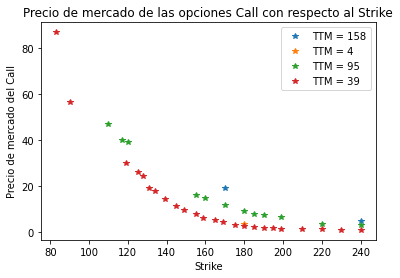

In [57]:
from matplotlib import pyplot as plt
CP = "C"
for TTM in TTMs:
    Ks = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios,'*', label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()
    

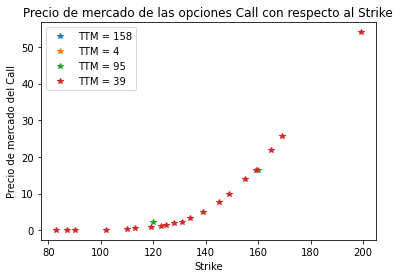

In [58]:

CP = "P"
for TTM in TTMs:
    Ks = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios,'*', label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()

In [59]:
Ks = list(set(panel_opciones_ggal_byma_limpio.Strike.values))

Ks[0:2]

[130.98, 133.98]

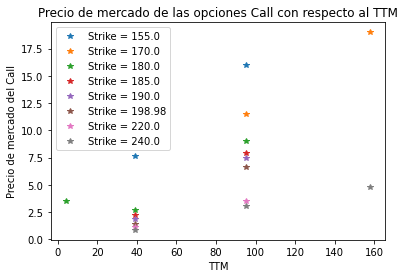

array([24.25])

In [60]:

CP = "C"
for K in Ks:
    TTMs = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.Strike == K) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].TTM.values
    precios = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.Strike == K) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Last.values
    if len(TTMs)>1:
        plt.plot(TTMs, precios,'*', label='Strike = '+str(K))

plt.legend()

plt.xlabel('TTM')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al TTM')
    
plt.show()
panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.Strike == K) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Last.values
    

## (5) Pasar a Excel/CSV

In [61]:
panel_opciones_byma_crudo = web_scraping_opciones_rava()
panel_opciones_byma_crudo.to_excel('Clase_1_panel_opciones_byma_crudo.xls')

panel_acciones_byma = obtener_panel_acciones()
panel_acciones_byma.to_excel('Clase_1_panel_acciones.xls')

panel_opciones_byma = obtener_panel_opciones_byma('', False)
panel_opciones_byma.to_excel('Clase_1_panel_opciones_byma.xls')

panel_opciones_byma_limpio = obtener_panel_opciones_byma('', True)
panel_opciones_byma_limpio.to_excel('Clase_1_panel_opciones_byma_limpio.xls')
panel_opciones_byma_limpio = obtener_panel_opciones_byma('', True)
panel_opciones_byma.to_excel('Clase_1_panel_opciones_byma.xls')
panel_opciones_byma_limpio.to_excel('Clase_1_panel_opciones_byma_limpio.xls')
                                                  
                                                  

<ipython-input-61-804b89e49c6b>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  panel_opciones_byma_crudo.to_excel('Clase_1_panel_opciones_byma_crudo.xls')
<ipython-input-61-804b89e49c6b>:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally 

## (6) Comparando los paneles

In [62]:
panel_opciones_ggal_rava_limpio = obtener_panel_opciones_byma('GGAL',True)

In [63]:
panel_opciones_ggal_homebroker_limpio = panel_opciones_homebroker(personal_data, 'GGAL', True)

In [64]:
panel_opciones_ggal_rava_limpio

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,GFGC180.JL,GGAL,142.7,C,180.000,4,3.500,3.500,0.792778
1,GFGC82983G,GGAL,142.7,C,82.983,39,86.984,86.984,1.719629
2,GFGV82983G,GGAL,142.7,P,82.983,39,0.081,0.106,1.719629
3,GFGV87.0AG,GGAL,142.7,P,87.000,39,0.090,0.120,1.640230
4,GFGC90.0AG,GGAL,142.7,C,90.000,39,56.600,56.600,1.585556
...,...,...,...,...,...,...,...,...,...
56,GFGC19898O,GGAL,142.7,C,198.980,95,6.600,6.600,0.717158
57,GFGC220.OC,GGAL,142.7,C,220.000,95,3.500,3.500,0.648636
58,GFGC240.OC,GGAL,142.7,C,240.000,95,3.100,3.220,0.594583
59,GFGC170.DI,GGAL,142.7,C,170.000,158,19.000,17.500,0.839412


In [65]:
panel_opciones_ggal_homebroker_limpio

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Close,Moneyness
0,GFGV82983G,GGAL,143.0,P,82.983,39,0.081,0.106,1.723245
1,GFGV87.0AG,GGAL,143.0,P,87.000,39,0.090,0.120,1.643678
2,GFGV90.0AG,GGAL,143.0,P,90.000,39,0.160,0.133,1.588889
3,GFGV102.AG,GGAL,143.0,P,102.000,39,0.190,0.280,1.401961
4,GFGV10998G,GGAL,143.0,P,109.980,39,0.404,0.423,1.300236
5,GFGV11298G,GGAL,143.0,P,112.980,39,0.610,0.550,1.265711
6,GFGV11898G,GGAL,143.0,P,118.980,39,0.889,0.900,1.201883
7,GFGV12498G,GGAL,143.0,P,124.980,39,1.500,1.494,1.144183
8,GFGC12798G,GGAL,143.0,C,127.980,39,24.250,20.602,1.117362
9,GFGV12798G,GGAL,143.0,P,127.980,39,1.850,1.852,1.117362


In [66]:
# Inner es la interseccion
# Outer es la union

merged = pd.merge(panel_opciones_ggal_rava_limpio, panel_opciones_ggal_homebroker_limpio, on=["Especie", "Ticker", "CallPut", "Strike", "TTM"], how='inner')

merged = merged.rename(
            columns={'Spot_x':'Spot_rava','Spot_y':'Spot_HB', 'Last_x': 'Last_rava', 'Last_y': 'Last_HB', 'Close_x': 'Close_rava', 'Close_y': 'Close_HB','previous_close':'Close'}, inplace=False)
       
merged = merged[
            ['Especie','Ticker', 'Spot_rava', 'Spot_HB', 'CallPut', 'Strike', 'TTM', 'Last_rava', 'Last_HB','Close_rava','Close_HB']]


merged

,Especie,Ticker,Spot_rava,Spot_HB,CallPut,Strike,TTM,Last_rava,Last_HB,Close_rava,Close_HB
0,GFGV82983G,GGAL,142.7,143.0,P,82.983,39,0.081,0.081,0.106,0.106
1,GFGV87.0AG,GGAL,142.7,143.0,P,87.000,39,0.090,0.090,0.120,0.120
2,GFGV90.0AG,GGAL,142.7,143.0,P,90.000,39,0.170,0.160,0.133,0.133
3,GFGV102.AG,GGAL,142.7,143.0,P,102.000,39,0.190,0.190,0.280,0.280
4,GFGV10998G,GGAL,142.7,143.0,P,109.980,39,0.421,0.404,0.423,0.423
5,GFGV11298G,GGAL,142.7,143.0,P,112.980,39,0.610,0.610,0.550,0.550
6,GFGV11898G,GGAL,142.7,143.0,P,118.980,39,0.889,0.889,0.900,0.900
7,GFGV12498G,GGAL,142.7,143.0,P,124.980,39,1.500,1.500,1.494,1.494
8,GFGC12798G,GGAL,142.7,143.0,C,127.980,39,24.250,24.250,20.602,20.602
9,GFGV12798G,GGAL,142.7,143.0,P,127.980,39,1.852,1.850,1.852,1.852


Genero algunas columnas de diferencias

In [67]:

merged['Dif_spot']=merged['Spot_rava']-merged['Spot_HB']
merged['Dif_last']=merged['Last_rava']-merged['Last_HB']
merged['Dif_close']=merged['Close_rava']-merged['Close_HB']

merged



,Especie,Ticker,Spot_rava,Spot_HB,CallPut,Strike,TTM,Last_rava,Last_HB,Close_rava,Close_HB,Dif_spot,Dif_last,Dif_close
0,GFGV82983G,GGAL,142.7,143.0,P,82.983,39,0.081,0.081,0.106,0.106,-0.3,0.000,0.0
1,GFGV87.0AG,GGAL,142.7,143.0,P,87.000,39,0.090,0.090,0.120,0.120,-0.3,0.000,0.0
2,GFGV90.0AG,GGAL,142.7,143.0,P,90.000,39,0.170,0.160,0.133,0.133,-0.3,0.010,0.0
3,GFGV102.AG,GGAL,142.7,143.0,P,102.000,39,0.190,0.190,0.280,0.280,-0.3,0.000,0.0
4,GFGV10998G,GGAL,142.7,143.0,P,109.980,39,0.421,0.404,0.423,0.423,-0.3,0.017,0.0
5,GFGV11298G,GGAL,142.7,143.0,P,112.980,39,0.610,0.610,0.550,0.550,-0.3,0.000,0.0
6,GFGV11898G,GGAL,142.7,143.0,P,118.980,39,0.889,0.889,0.900,0.900,-0.3,0.000,0.0
7,GFGV12498G,GGAL,142.7,143.0,P,124.980,39,1.500,1.500,1.494,1.494,-0.3,0.000,0.0
8,GFGC12798G,GGAL,142.7,143.0,C,127.980,39,24.250,24.250,20.602,20.602,-0.3,0.000,0.0
9,GFGV12798G,GGAL,142.7,143.0,P,127.980,39,1.852,1.850,1.852,1.852,-0.3,0.002,0.0
